In [2]:
import dxchange
import numpy as np
from xlearn.utils import nor_data
from xlearn.utils import extract_3d
from xlearn.utils import img_window
from xlearn.classify import model
import matplotlib.pyplot as plt
import time
import glob

Using TensorFlow backend.


In [3]:
np.random.seed(1337)
dim_img = 128
patch_size = (dim_img, dim_img)
batch_size = 50
nb_classes = 2
nb_epoch = 12

number of convolutional filters to use

In [3]:
nb_filters = 32

size of pooling area for max pooling

In [4]:
nb_pool = 2

convolution kernel size

In [5]:
nb_conv = 3

Please download the test data from the classify_evaluate folder at

http://tinyurl.com/APS-convnet

and put them in the test_data folder

In [6]:
nb_evl = 100

In [7]:
fnames = glob.glob('../../test/test_data/center_test/*.tiff')
fnames = np.sort(fnames)

In [8]:
mdl = model(dim_img, nb_filters, nb_conv, nb_classes)

mdl.load_weights('weight_center.h5')

Y_score = np.zeros((len(fnames)))


/home/yangx/anaconda3/lib/python3.6/site-packages/xlearn-0.2.0-py3.6.egg/xlearn/classify.py:98: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="valid")`
/home/yangx/anaconda3/lib/python3.6/site-packages/xlearn-0.2.0-py3.6.egg/xlearn/classify.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/home/yangx/anaconda3/lib/python3.6/site-packages/xlearn-0.2.0-py3.6.egg/xlearn/classify.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [9]:
for i in range(len(fnames)):
    img = dxchange.read_tiff(fnames[i])
    img = nor_data(img)
    X_evl = np.zeros((nb_evl, dim_img, dim_img))

    for j in range(nb_evl):
        X_evl[j] = img_window(img[360:1460, 440:1440], dim_img)
    X_evl = X_evl.reshape(X_evl.shape[0], dim_img, dim_img, 1)
    Y_evl = mdl.predict(X_evl, batch_size=batch_size)
    Y_score[i] = sum(np.dot(Y_evl, [0, 1]))

The well-centered reconstruction is: ../../test/test_data/center_test/1048.tiff


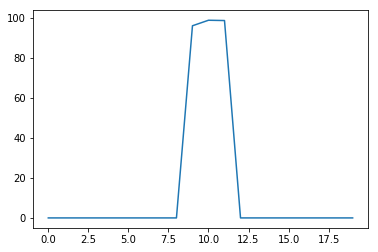

In [10]:
ind_max = np.argmax(Y_score)
print('The well-centered reconstruction is:', fnames[ind_max])
plt.plot(Y_score)
plt.show()